<a href="https://colab.research.google.com/github/Yanaput/EGCI463-pattern-recognition-project/blob/main/nsynth_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://huggingface.co/datasets/TwinkStart/Nsynth

In [ ]:
import numpy as np
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install librosa keras tensorflow

In [ ]:
from google.colab import userdata
projPath  = userdata.get('driveProjDir') #replace this with your csv path

In [ ]:
features_label = pd.read_csv(f"/content/drive/MyDrive/{projPath}/features_label.csv")

In [ ]:
features_label

,0,1,2,3,4,5,6,7,8,9,...,12023,12024,12025,12026,12027,12028,12029,12030,12031,instrument_family
0,-53.803909,-57.194024,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,3
1,-41.581627,-41.147030,-50.666237,-64.943981,-60.756839,-60.464744,-60.993004,-63.912845,-61.711862,-62.382845,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,6
2,-16.751124,-14.606224,-14.500415,-14.003709,-14.280511,-14.614283,-15.854235,-16.143106,-17.500415,-20.172544,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-74.445993,0
3,-2.217868,0.000000,-2.265561,-4.262692,-5.280903,-6.297461,-7.342139,-8.409485,-9.516589,-10.664447,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,0
4,-39.486546,-30.101491,-29.918419,-34.714702,-49.770357,-55.999469,-55.860402,-53.477410,-59.263462,-60.489511,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,-22.894519,-21.310778,-27.454087,-33.497683,-33.068524,-32.833817,-32.720519,-32.592567,-32.394799,-32.219643,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,4
4092,-50.416488,-42.023727,-39.495096,-41.555525,-51.454520,-54.918152,-60.328524,-69.375597,-73.076184,-73.600458,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,0
4093,-22.917634,-27.114879,-52.179479,-67.841889,-68.402644,-65.043253,-62.685682,-72.406796,-67.885038,-63.723752,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,5
4094,-68.290314,-59.045592,-54.324949,-57.203160,-57.954304,-56.753415,-57.259861,-60.041177,-60.289779,-60.373389,...,-80.0,-80.0,-80.0,-78.91858,-80.0,-80.0,-80.0,-80.0,-63.326588,9


In [ ]:
class_list = ['guitar',
 'organ',
 'bass',
 'keyboard',
 'reed',
 'string',
 'mallet',
 'flute',
 'brass',
 'vocal'
]

# Model


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_label.iloc[:, :-1], features_label.iloc[:,-1], test_size=0.2, random_state=3213123)

In [ ]:
lr = LogisticRegression(max_iter=20000)

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=20000)

In [ ]:
pred = lr.predict(x_test)

In [ ]:
pred

array([4, 1, 3, 6, 0, 1, 0, 8, 6, 3, 4, 6, 4, 9, 9, 3, 3, 0, 0, 0, 6, 1,
       2, 4, 1, 0, 8, 6, 0, 8, 6, 9, 3, 5, 9, 4, 1, 4, 3, 1, 0, 4, 0, 0,
       7, 0, 4, 3, 3, 1, 0, 6, 4, 3, 4, 6, 0, 6, 4, 2, 9, 0, 4, 0, 6, 4,
       0, 3, 3, 0, 0, 3, 0, 6, 3, 0, 1, 1, 2, 3, 4, 0, 6, 0, 0, 8, 3, 4,
       0, 0, 6, 0, 3, 8, 0, 0, 8, 4, 3, 2, 3, 6, 3, 5, 4, 3, 1, 4, 8, 0,
       6, 2, 0, 6, 4, 7, 3, 0, 1, 3, 4, 4, 8, 7, 5, 0, 2, 0, 4, 9, 8, 8,
       6, 4, 0, 0, 4, 7, 3, 0, 4, 0, 4, 2, 3, 1, 4, 4, 9, 3, 4, 7, 8, 3,
       3, 4, 1, 0, 4, 0, 3, 2, 4, 4, 0, 0, 8, 4, 6, 5, 4, 4, 3, 2, 8, 3,
       3, 0, 4, 3, 4, 0, 0, 2, 8, 3, 3, 4, 6, 3, 6, 4, 6, 7, 4, 2, 5, 0,
       6, 4, 4, 8, 0, 3, 4, 4, 3, 4, 3, 7, 8, 0, 8, 0, 4, 3, 0, 0, 1, 3,
       0, 3, 0, 6, 4, 4, 4, 4, 0, 3, 0, 3, 6, 3, 3, 0, 4, 7, 1, 0, 4, 3,
       4, 1, 4, 7, 0, 0, 0, 0, 6, 0, 0, 3, 7, 6, 0, 5, 1, 4, 4, 4, 7, 3,
       5, 0, 1, 0, 0, 6, 8, 6, 9, 6, 9, 0, 3, 6, 5, 6, 8, 4, 9, 3, 9, 3,
       0, 4, 6, 3, 0, 4, 0, 2, 0, 0, 3, 0, 4, 3, 4,

In [ ]:
lr.score(x_test, y_test)

0.8719512195121951

In [ ]:
np.shape(y_test)

(820,)

In [ ]:
np.shape(pred)

(820,)

In [ ]:
lr.classes_
# no instrument Synth Lead in the test set of this Nsynth dataset

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

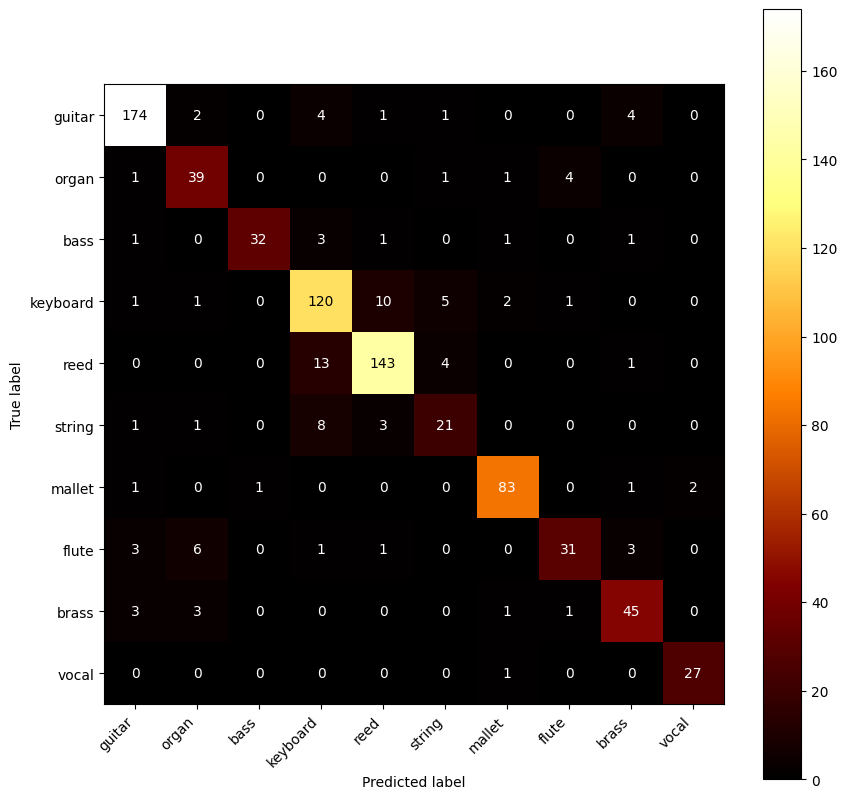

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_list)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.plot(ax=ax, cmap="afmhot")
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
f1_score(y_test, pred, average='macro')

0.845802853313087